# Photoelectric Effect

In [1]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
from math import *
from numpy import *
from scipy.optimize import curve_fit

In [2]:
#show graphs inline (do not use for print publication quality graphs)
%matplotlib inline

In [3]:
data = """
5.19031E+14	0.70875	0.009912114
5.49451E+14	0.8225	0.00591608
6.88073E+14	1.4325	0.020615528
7.40741E+14	1.64	0.021602469
8.21918E+14	1.925	0.031091264
""".split('\n')

In [4]:
#
# Store data in lists
#
flist = []
vlist = []
unclist = []
for s in data:
    if s:
        f,v,unc = s.split()     # break string in two
        f=float(f)          # convert f to float
        v=float(v)          # convert v to float
        unc=float(unc)          # convert uncertainy to float
        flist.append(f)
        vlist.append(v)
        unclist.append(unc)
print(flist)
print(vlist)
print(unclist)


[519031000000000.0, 549451000000000.0, 688073000000000.0, 740741000000000.0, 821918000000000.0]
[0.70875, 0.8225, 1.4325, 1.64, 1.925]
[0.009912114, 0.00591608, 0.020615528, 0.021602469, 0.031091264]


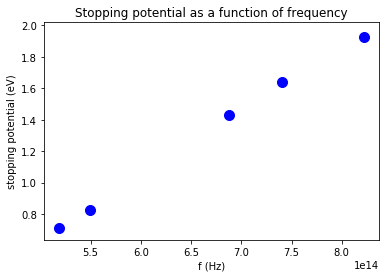

In [5]:
#graph
stoppingpotentialgraph= plt.figure()
plt.title('Stopping potential as a function of frequency')
plt.ylabel('stopping potential (eV)')
plt.xlabel('f (Hz)')
plt.plot(flist,vlist,'bo', markersize=10,label="data")
plt.errorbar(flist,vlist,yerr=unclist, fmt="none", color='r')
#plt.ylim(-2,2)
#plt.xlim(0,8.5e14)
#legend=plt.legend(loc=2) #name used in case we want to use Plotly
plt.show()

#create interactive plotly graph
#legend.remove() #plotly gives error for legend
#py.sign_in("hpuphysics", "fwxi6w237k")
#py.iplot_mpl(collapseTimeFigurePasco, strip_style = True)

In [6]:
#function takes arrays of data and returns an array
def func(x, a, b):
    return a*x+b #linear function

In [7]:
#convert list to a numpy array
yarray=asarray(vlist)
xarray=asarray(flist)
popt, pcov = curve_fit(func, xarray, yarray)
print(popt,pcov)

[  4.09487296e-15  -1.41260193e+00] [[  1.09621998e-32  -7.27717741e-18]
 [ -7.27717741e-18   4.97460342e-03]]


In [8]:
p1 = popt[0] #slope
p2 = popt[1] #intercept
residuals = yarray - func(xarray,p1,p2) #difference in y data and y best fit function
ressquared = sum(residuals**2)
print(ressquared) #sum of square of residuals

0.00215552411749


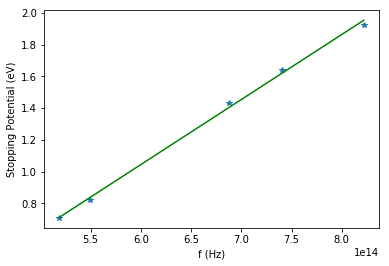

In [9]:
bestfit=func(xarray,p1,p2) #best fit function
plt.plot(flist,vlist,'*') #plot data
plt.plot(flist,bestfit,'g') #plot best fit function
plt.xlabel('f (Hz)')
plt.ylabel('Stopping Potential (eV)');